# Learning Qiskit basics

QuantumRegister = circuit's qubits

ClassicalRegister = classical bits in which we will save the qubit's measurements

In [3]:
from qiskit import QuantumRegister, ClassicalRegister

n=3

q = QuantumRegister(n)
c = ClassicalRegister(n)  

QuantumCircuit build the circuit composed of the classical and quantum bits

q0_0: 
      
q0_1: 
      
q0_2: 
      
c0: 3/

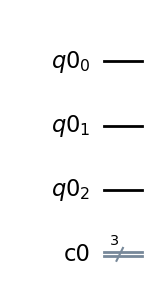

In [8]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(q,c)

display(circuit.draw())

# use "mpl" for plotting with matplotlib
display(circuit.draw(output="mpl"))


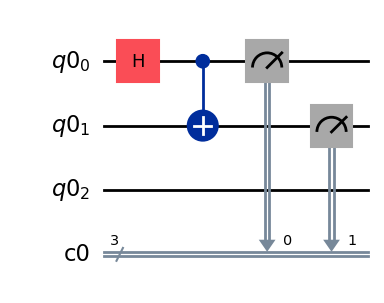

In [9]:
# hadamard gate on qubit 0
circuit.h(0)

# control-x, being control on 0 and target on 1
circuit.cx(0,1)

# measure qubits 0,1 and save on bits 0,1  
circuit.measure([0,1], [0,1])

circuit.draw(output='mpl')

## Running on a simulator

In [ ]:
from qiskit_aer import AerSimulator

# class AerSimulator(configuration=None, 
                    # properties=None, 
                    # provider=None, 
                    # target=None, 
                    # **backend_options)

simulator = AerSimulator()

The method 'available_methods()' gives all the methods we can use to do the simulation

In [17]:
simulator.available_methods()

('automatic',
 'statevector',
 'density_matrix',
 'stabilizer',
 'matrix_product_state',
 'extended_stabilizer',
 'unitary',
 'superop')

From the API documentation:

"automatic": Default simulation method. Select the simulation method automatically based on the circuit and noise model.

"statevector": A dense statevector simulation that can sample measurement outcomes from ideal circuits with all measurements at end of the circuit. For noisy simulations each shot samples a randomly sampled noisy circuit from the noise model.

"density_matrix": A dense density matrix simulation that may sample measurement outcomes from noisy circuits with all measurements at end of the circuit.

"stabilizer": An efficient Clifford stabilizer state simulator that can simulate noisy Clifford circuits if all errors in the noise model are also Clifford errors.

"extended_stabilizer": An approximate simulated for Clifford + T circuits based on a state decomposition into ranked-stabilizer state. The number of terms grows with the number of non-Clifford (T) gates.

"matrix_product_state": A tensor-network statevector simulator that uses a Matrix Product State (MPS) representation for the state. This can be done either with or without truncation of the MPS bond dimensions depending on the simulator options. The default behaviour is no truncation.

"unitary": A dense unitary matrix simulation of an ideal circuit. This simulates the unitary matrix of the circuit itself rather than the evolution of an initial quantum state. This method can only simulate gates, it does not support measurement, reset, or noise.

"superop": A dense superoperator matrix simulation of an ideal or noisy circuit. This simulates the superoperator matrix of the circuit itself rather than the evolution of an initial quantum state. This method can simulate ideal and noisy gates, and reset, but does not support measurement.

"tensor_network": A tensor-network based simulation that supports both statevector and density matrix. Currently there is only available for GPU and accelerated by using cuTensorNet APIs of cuQuantum.

If we initialize the class without any parameter, the simulation will not include any noise model

In [48]:
job = simulator.run(circuit)
# job is an AerJob

# methods of AerJob
print(job.done())
print(job.backend())
print(job.running())
print(job.executor())

False
AerSimulator('aer_simulator')
False


The simulation is done using the method run from AerSimulator() class. We can obtain the results of the simulation running the method .result()

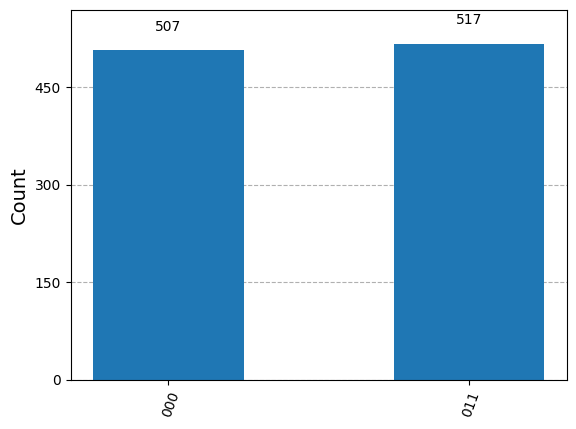

In [53]:
counts = job.result().get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Running on real quantum hardware

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

'''
QiskitRuntimeService.save_account(channel='ibm_cloud', 
                               token='IBM cloud API key', 
                               instance='IBM cloud CRN',
                               name='learning-qiskit',
                               set_as_default=True)
'''


In [3]:
service = QiskitRuntimeService(name = 'learning-qiskit')

In [70]:
for backend in service.backends():
    print(backend.name)

ibmq_qasm_simulator
simulator_extended_stabilizer
simulator_mps
simulator_stabilizer
simulator_statevector


job id: ctfd99hvrf7pptepkqog


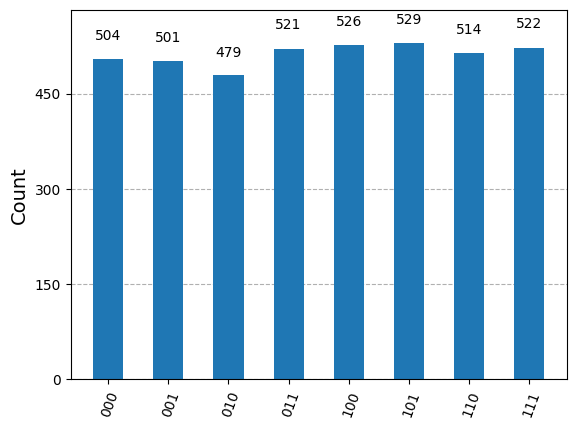

In [100]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler


n = 3

q = QuantumRegister(n)
circ = QuantumCircuit(q)

# Uniform superposition
for j in range(n):
    circ.h(q[j])
    
circ.measure_all()

# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService(channel='ibm_cloud', 
                               token='', 
                               instance=''
                               )

backend = service.backend(name='ibmq_qasm_simulator')

sampler = Sampler(backend)
job = sampler.run([circ])
print(f"job id: {job.job_id()}")
result = job.result()

counts = result[0].data.meas.get_counts()

plot_histogram(counts)